# Image Preprocessing — Resizing, Cropping, and Filters

**Project Objectives**
- Explore image preprocessing techniques: **resizing**, **cropping**, and **filters**.

**Learning Objectives**
- Understand the importance of preprocessing
- Resize and crop images
- Apply common filters (averaging, Gaussian, Laplacian, Sobel)

**Dataset**
- Directory: `'/anvil/projects/tdm/data/icecream/hd/images'`

In [7]:
# Setup & Imports
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

#Pull Dataset 
IMAGE_DIR = '/anvil/projects/tdm/data/icecream/hd/images'
IMAGE_FILE = '56_hd.png'
IMAGE_PATH = str(Path(IMAGE_DIR) / IMAGE_FILE)

image_opencv = cv2.imread(IMAGE_PATH) # BGR
image_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)  # RGB for Matplotlib


---
## Question 1 

**Task:** Load into `image_opencv`, print dimensions, and display correctly with Matplotlib;

Dimensions (H x W x C): 633 x 540 x 3


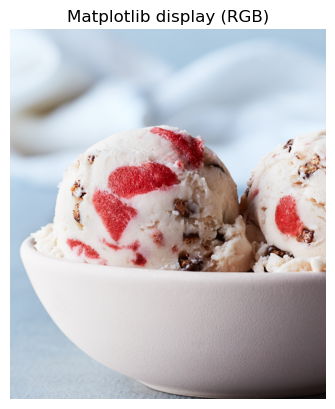

In [8]:
h, w, c = image_opencv.shape
print(f"Dimensions (H x W x C): {h} x {w} x {c}")

plt.imshow(image_rgb)
plt.title('Matplotlib display (RGB)')
plt.axis('off')
plt.show()

---
## Question 2 

**Cropping** via NumPy slicing and show results.

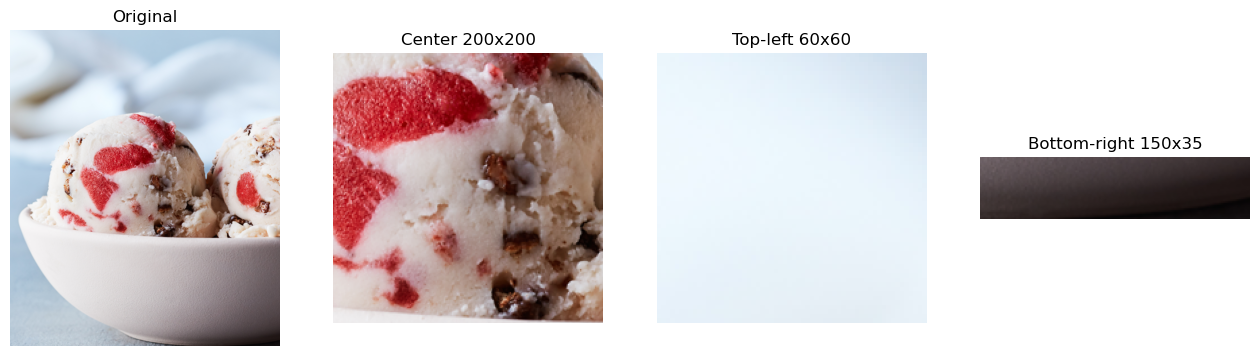

In [9]:
def crop_image(image, top_left_coordinates, bottom_right_coordinates):
    x1, y1 = top_left_coordinates
    x2, y2 = bottom_right_coordinates
    return image[y1:y2, x1:x2]

image = image_rgb
cropped_image1 = crop_image(image, (170, 217), (370, 417))
cropped_image2 = crop_image(image, (0, 0), (60, 60))
cropped_image3 = crop_image(image, (390, 598), (540, 633))

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
ax[0].imshow(image); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].imshow(cropped_image1); ax[1].set_title('Center 200x200'); ax[1].axis('off')
ax[2].imshow(cropped_image2); ax[2].set_title('Top-left 60x60'); ax[2].axis('off')
ax[3].imshow(cropped_image3); ax[3].set_title('Bottom-right 150x35'); ax[3].axis('off')
plt.show()


---
## Question 3

**Resizing** fixed size and aspect-ratio-preserving; compare nearest, bilinear, and area.

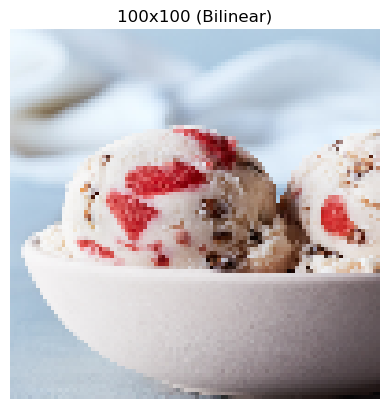

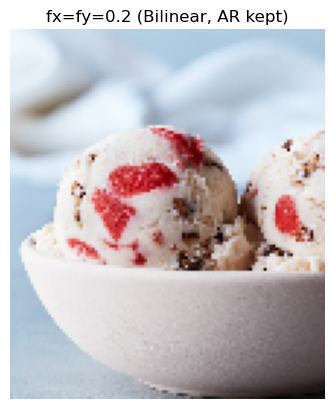

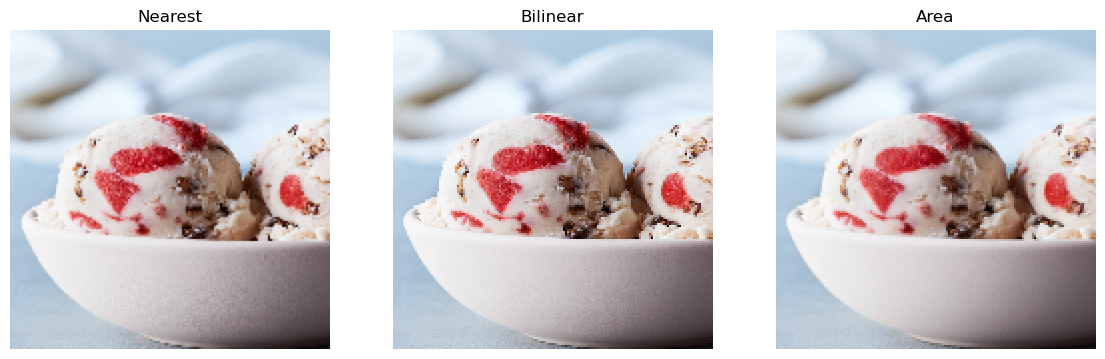

In [11]:
resized_100_linear = cv2.resize(image_rgb, (100, 100), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_100_linear); plt.title('100x100 (Bilinear)'); plt.axis('off'); plt.show()

resized_aspect_linear = cv2.resize(image_rgb, (0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_aspect_linear); plt.title('fx=fy=0.2 (Bilinear, AR kept)'); plt.axis('off'); plt.show()

target_size = (160, 160)
resized_nearest = cv2.resize(image_rgb, target_size, interpolation=cv2.INTER_NEAREST)
resized_linear  = cv2.resize(image_rgb, target_size, interpolation=cv2.INTER_LINEAR)
resized_area    = cv2.resize(image_rgb, target_size, interpolation=cv2.INTER_AREA)

fig, ax = plt.subplots(1, 3, figsize=(14, 5))
ax[0].imshow(resized_nearest); ax[0].set_title('Nearest'); ax[0].axis('off')
ax[1].imshow(resized_linear);  ax[1].set_title('Bilinear'); ax[1].axis('off')
ax[2].imshow(resized_area);    ax[2].set_title('Area');    ax[2].axis('off')
plt.show()

---
## Question 4 (2 points)

Averaging and Gaussian blur; try 3 Gaussian kernel sizes.

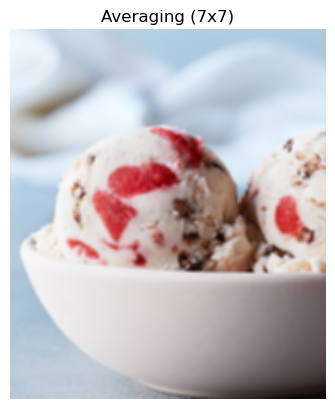

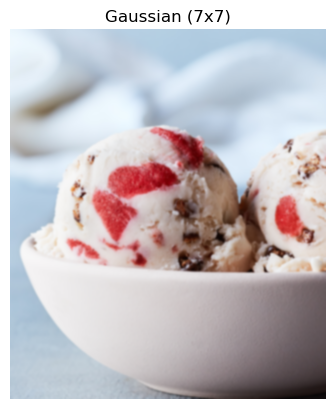

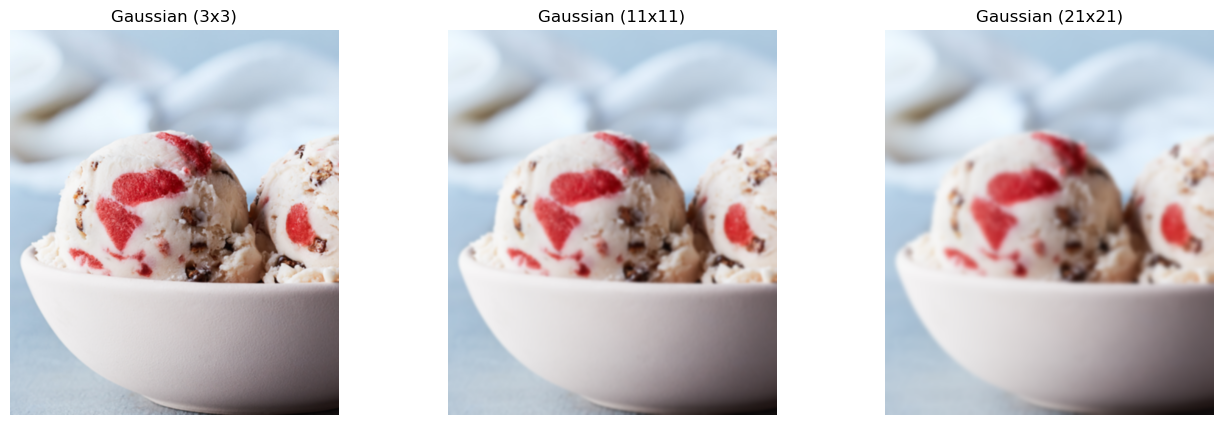

In [13]:
kernel = np.ones((7, 7), np.float32) / 49
filtered_avg = cv2.filter2D(image_rgb, -1, kernel)
plt.imshow(filtered_avg); plt.title('Averaging (7x7)'); plt.axis('off'); plt.show()

gauss_7 = cv2.GaussianBlur(image_rgb, (7, 7), 0)
plt.imshow(gauss_7); plt.title('Gaussian (7x7)'); plt.axis('off'); plt.show()

gauss_3 = cv2.GaussianBlur(image_rgb, (3, 3), 0)
gauss_11 = cv2.GaussianBlur(image_rgb, (11, 11), 0)
gauss_21 = cv2.GaussianBlur(image_rgb, (21, 21), 0)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(gauss_3);  ax[0].set_title('Gaussian (3x3)');  ax[0].axis('off')
ax[1].imshow(gauss_11); ax[1].set_title('Gaussian (11x11)'); ax[1].axis('off')
ax[2].imshow(gauss_21); ax[2].set_title('Gaussian (21x21)'); ax[2].axis('off')
plt.show()


---
## Question 5 (2 points)

Edges with Laplacian and Sobel; combine Sobel magnitudes.

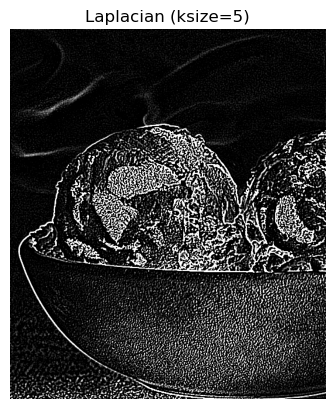

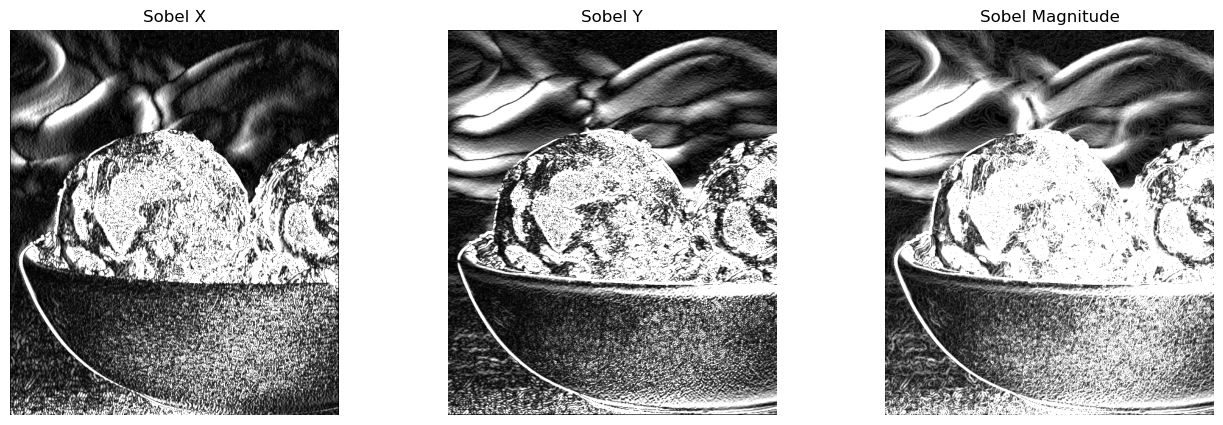

In [14]:
gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

lap = cv2.Laplacian(gray, ddepth=cv2.CV_8U, ksize=5)
plt.imshow(lap, cmap='gray'); plt.title('Laplacian (ksize=5)'); plt.axis('off'); plt.show()

sobel_x = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=5)
sobel_y = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=5)
sobel_x_disp = cv2.convertScaleAbs(sobel_x)
sobel_y_disp = cv2.convertScaleAbs(sobel_y)
mag = cv2.magnitude(sobel_x, sobel_y)
mag_disp = cv2.convertScaleAbs(mag)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(sobel_x_disp, cmap='gray'); ax[0].set_title('Sobel X'); ax[0].axis('off')
ax[1].imshow(sobel_y_disp, cmap='gray'); ax[1].set_title('Sobel Y'); ax[1].axis('off')
ax[2].imshow(mag_disp,    cmap='gray'); ax[2].set_title('Sobel Magnitude'); ax[2].axis('off')
plt.show()